<div align="left" style="font-weight: bold; font-family: Computer Modern; font-size: 24px; text-align: left; line-height: 1.5;">
    Federal University of Bahia (UFBA)
    <br>
    Department of Electrical and Computer Engineering
    <br>
    Course: ENGG67 - Introduction to Machine Learning
    <br>
    Professor: Antônio Fernandes
    <br>
    Students: Gabriel Correia and Márcio Barros
</div>


---

<h2 align="left" style="font-weight: bold; font-family: Computer Modern;font-size: 32px;text-align: left;">
    Evaluation 1: Principal Component Analysis (PCA) Algorithm
</h2>

In [186]:
# Importing library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define the URL to download the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get(url)

# Save the downloaded file to the local system
with open("iris.data", "wb") as file:
    file.write(response.content)

# Read the data from the downloaded CSV file
column_names = ["sepal_length", "sepal_width",
                "petal_length", "petal_width", "class"]
iris_data = pd.read_csv("iris.data", header=None, names=column_names)

# Display the dataset
iris_data

# or use iris_data.head() to show the first few rows


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## a) Characterize the data in terms of Type and Scale

In [187]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The columns sepal_length, sepal_width, petal_length, and petal_width are all continuous numerical attributes represented as floats. The scale of these columns is the real measurement scale, which is in centimeters. Therefore, they are of the quantitative type and use a ratio scale.

On the other hand, the class column, represented by a string, is qualitative or categorical since it indicates the species of each flower. It is a nominal categorical variable because there is no natural order between the classes (setosa, versicolor, and virginica).

## b) Is the data set univariate or multivariate?

The set is multivariate because it has more than one attribute per object, specifically four input attributes. In the table in letter A this could already be identified, but here we make it even more explicit in a direct way.

In [188]:
iris_data.columns.difference(['target', 'species'])

Index(['class', 'petal_length', 'petal_width', 'sepal_length', 'sepal_width'], dtype='object')

## c) Check the need for data balancing and statistically characterize the data

In [189]:
iris_data['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

To check whether the data set needs balancing, let's analyze the number of elements for each characteristic of the main attribute. With the count, we can see that, as the number of objects is the same, the data set does not need balancing as it is already balanced. 

To characterize the data statistically, let's look at the following tables and graphs:

In [190]:
iris_data.drop(columns=['class']).describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


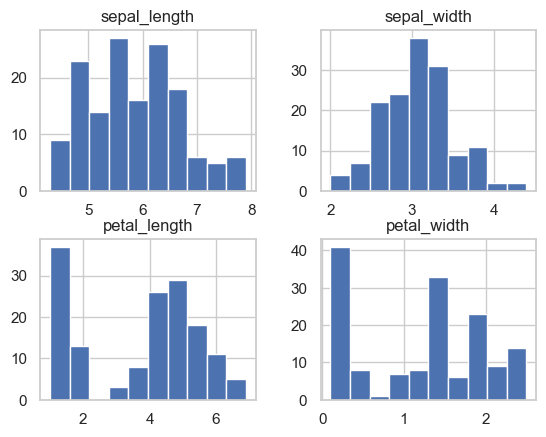

In [191]:
iris_data.hist()
plt.show()

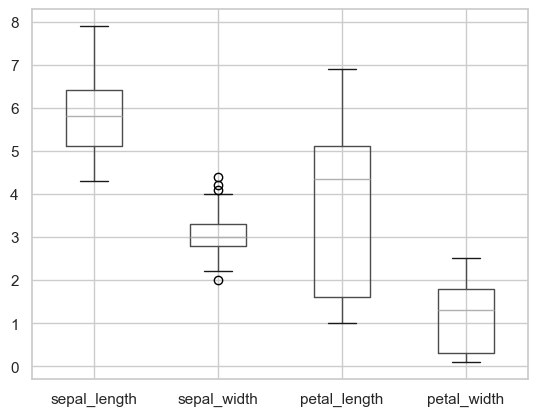

In [192]:
iris_data.boxplot()
plt.show()

From the analysis of the BoxPlot, we can make some observations from a statistical perspective, but for this, we will separate each attribute and make certain considerations:

sepal_length: We can observe that, in the analysis of sepal length, the data is reasonably well concentrated since the median is close to the middle of the interquartile range (which is small), with the second and third quartiles having a short distance. However, from the analysis of the previous table, we can see that this attribute presents a considerable error (std).

sepal_width: In the sepal width, we can observe an even more pronounced behavior than the previous one, as the interquartile range is even smaller, with the benefit of a low standard error (std), as noted in the previous table. The attributes are concentrated as the median is close to the range between the second and third quartiles. However, in this boxplot, we can detect the presence of outliers that may distort the mean and variance of the sample.

petal_length: In the analysis of the petal length attribute, we can see that there is not such strong concentration, as the median is closer to the third quartile, which already shows a deviation and a higher degree of dispersion. Despite this low concentration, no outliers were detected.

petal_width: For our last attribute in analysis (petal width), we can observe that the data is concentrated with the median more shifted towards the third quartile.

---

NOTE: We could have also performed the same analysis above using histograms along with the data table containing the values of the main statistical analysis metrics.

## d) Analyze the data for incompleteness, inconsistencies, redundancies and noise

From the info() function called in section a), we can see that there is no missing data, so there is no incompleteness.

Now let's check for inconsistencies such as negative values or any unexpected data within each attribute:

In [193]:
print( iris_data['class'].unique() )

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


There is no presence of unexpected data in the classes.

From the boxplot of the distribution of flower measurement data created in section c), we observe that there are no incongruent data such as negative values, nor any zeroed data that could be questionable.

We can perform a second check using the following function:

In [194]:
# Define the numerical columns to be checked
numeric_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Check for zero or negative values in the dataset
inconsistency = (iris_data[numeric_columns] <= 0).any()

# Print the result of the inconsistency check
print("Are there any inconsistent values? :")
print(inconsistency)

Are there any inconsistent values? :
sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
dtype: bool


As for redundancy, we can directly check for its presence and automatically remove these lines if there are any:

In [195]:
# Identify the indices of duplicate rows in the dataset
duplicate_indices = iris_data[iris_data.duplicated()].index

# Display information about duplicate rows
print(f"Number of duplicate rows: {iris_data.duplicated().sum()}")
print("Indices of duplicate rows:")
print(iris_data[iris_data.duplicated()].index)

# Remove duplicate rows
iris_data_n = iris_data.drop_duplicates()
print(f"Number of duplicate rows in the new dataset: {iris_data_n.duplicated().sum()}")


Number of duplicate rows: 3
Indices of duplicate rows:
Index([34, 37, 142], dtype='int64')
Number of duplicate rows in the new dataset: 0


There were three redundant lines that were removed from the original matrix

Noise in this database can be either the outliers present in the boxplot in letter c) or size values that are associated with certain species, as in the following graph:

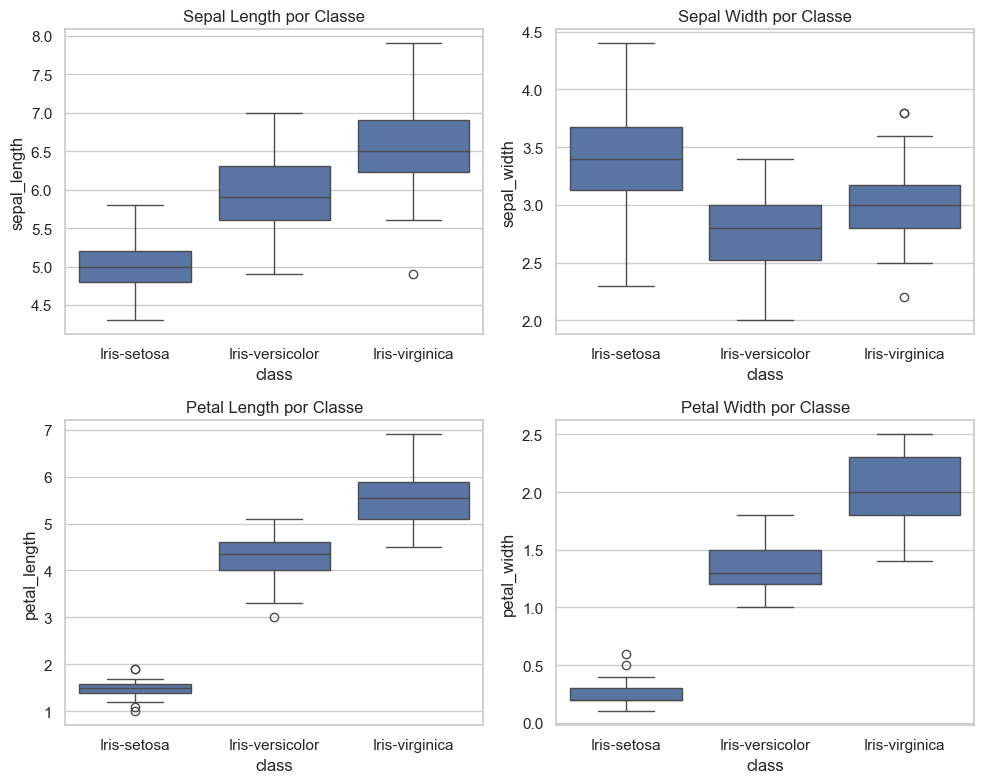

In [196]:
plt.figure(figsize=(10, 8))

# Sepal Length
plt.subplot(2, 2, 1)
sns.boxplot(data=iris_data, x="class", y="sepal_length")
plt.title("Sepal Length por Classe")

# Sepal Width
plt.subplot(2, 2, 2)
sns.boxplot(data=iris_data, x="class", y="sepal_width")
plt.title("Sepal Width por Classe")

# Petal Length
plt.subplot(2, 2, 3)
sns.boxplot(data=iris_data, x="class", y="petal_length")
plt.title("Petal Length por Classe")

# Petal Width
plt.subplot(2, 2, 4)
sns.boxplot(data=iris_data, x="class", y="petal_width")
plt.title("Petal Width por Classe")

plt.tight_layout()

# Show graphic
plt.show()

Outliers in these graphs can also be noise.

## e) Promote data transformation consistent with the database under analysis


One of the traditional ways to perform a data transformation consistent with the database under analysis is to normalize the data, which involves bringing everything within the same range of analysis in order to directly visualize its parameters with all attributes on the same basis. The process consists of the ratio of the difference between a desired value and the minimum value of the range over the maximum amplitude variation (maximum minus minimum). The following process illustrates this:

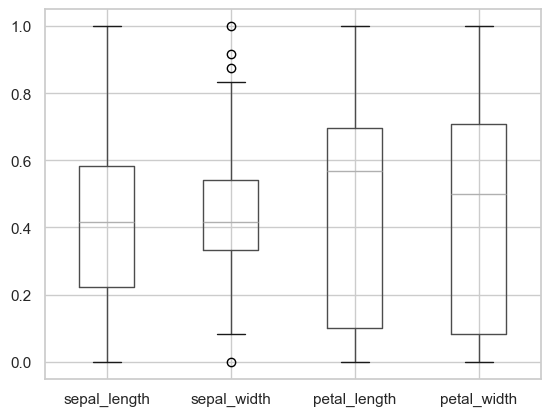

In [197]:
iris_nrmlzcao = iris_data[['sepal_length','sepal_width','petal_length','petal_width']]
normalized_df = (iris_nrmlzcao - iris_nrmlzcao.min()) / (iris_nrmlzcao.max() - iris_nrmlzcao.min())
normalized_df.boxplot()
plt.show()

In [198]:
normalized_df = normalized_df.copy(deep=True)
normalized_df['species'] = iris_data['class']
normalized_df = normalized_df.sort_index(axis=1)

iris_nrmlz = normalized_df

iris_nrmlz

,petal_length,petal_width,sepal_length,sepal_width,species
0,0.067797,0.041667,0.222222,0.625000,Iris-setosa
1,0.067797,0.041667,0.166667,0.416667,Iris-setosa
2,0.050847,0.041667,0.111111,0.500000,Iris-setosa
3,0.084746,0.041667,0.083333,0.458333,Iris-setosa
4,0.067797,0.041667,0.194444,0.666667,Iris-setosa
...,...,...,...,...,...
145,0.711864,0.916667,0.666667,0.416667,Iris-virginica
146,0.677966,0.750000,0.555556,0.208333,Iris-virginica
147,0.711864,0.791667,0.611111,0.416667,Iris-virginica
148,0.745763,0.916667,0.527778,0.583333,Iris-virginica


In [199]:
iris_nrmlz.drop(columns=['species']).describe()


,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.467571,0.457778,0.428704,0.439167
std,0.299054,0.317984,0.230018,0.180664
min,0.000000,0.000000,0.000000,0.000000
25%,0.101695,0.083333,0.222222,0.333333
50%,0.567797,0.500000,0.416667,0.416667
75%,0.694915,0.708333,0.583333,0.541667
max,1.000000,1.000000,1.000000,1.000000


Another way to modify the analysis of the database would be by observing new attributes that could correlate with the existing ones (a process known as Enrichment).

In [200]:
iris_areas = iris_data.copy(deep=True)
iris_areas['sepal_area'] = iris_areas['sepal_length'].mul(iris_areas['sepal_width'], axis=0)
iris_areas['petal_area'] = iris_areas['petal_length'].mul(iris_areas['petal_width'], axis=0)
iris_areas = iris_areas.sort_index(axis=1)
iris_areas

,class,petal_area,petal_length,petal_width,sepal_area,sepal_length,sepal_width
0,Iris-setosa,0.28,1.4,0.2,17.85,5.1,3.5
1,Iris-setosa,0.28,1.4,0.2,14.70,4.9,3.0
2,Iris-setosa,0.26,1.3,0.2,15.04,4.7,3.2
3,Iris-setosa,0.30,1.5,0.2,14.26,4.6,3.1
4,Iris-setosa,0.28,1.4,0.2,18.00,5.0,3.6
...,...,...,...,...,...,...,...
145,Iris-virginica,11.96,5.2,2.3,20.10,6.7,3.0
146,Iris-virginica,9.50,5.0,1.9,15.75,6.3,2.5
147,Iris-virginica,10.40,5.2,2.0,19.50,6.5,3.0
148,Iris-virginica,12.42,5.4,2.3,21.08,6.2,3.4


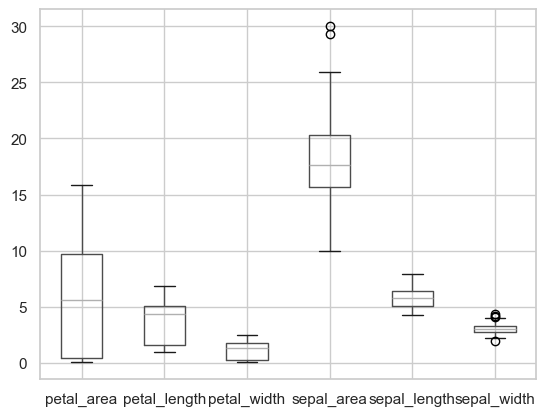

In [201]:
iris_areas.boxplot()
plt.show()

In [202]:
# Get the principal component loadings (weights of each feature in the principal components)
loadings = pca.components_

# Separate the numeric attributes
numeric_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
col = iris_data[numeric_columns]

# Create a DataFrame to visualize the weights
loadings_df = pd.DataFrame(loadings, columns=col.columns, index=['PC1', 'PC2'])

# Display the loadings
print("Loadings of the Attributes on the Principal Components:")
print(loadings_df)

Loadings of the Attributes on the Principal Components:
     sepal_length  sepal_width  petal_length  petal_width
PC1      0.522372    -0.263355      0.581254     0.565611
PC2      0.372318     0.925556      0.021095     0.065416


## f) Use principal component analysis (PCA) to generate graphs in attribute space

To apply PCA it is necessary to standardize the attributes

In [203]:
# Standardize the attributes
scaler = StandardScaler()

# Excluding the class and normalizing
iris_data_scaled = scaler.fit_transform(iris_data.iloc[:, :-1])


Applying the analysis:

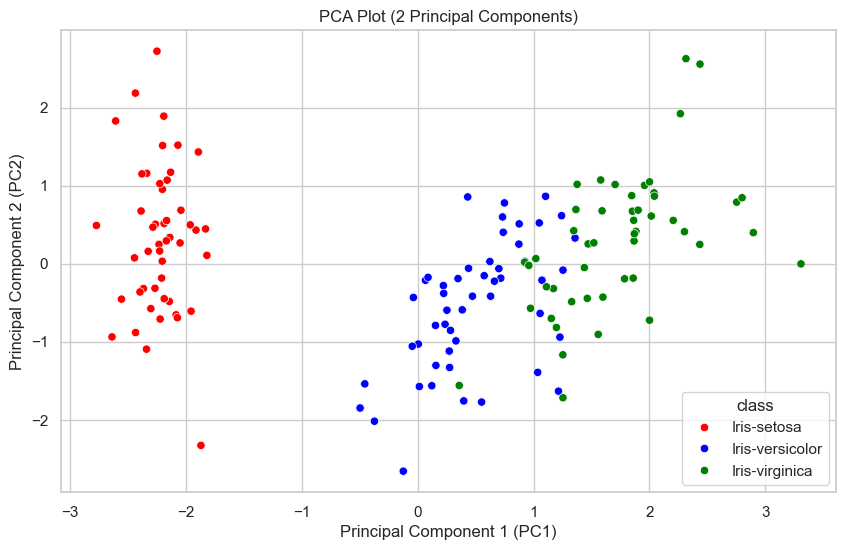

In [204]:
# Apply PCA with 2 principal components (for 2D visualization)
pca = PCA(n_components=2)
iris_data_pca = pca.fit_transform(iris_data_scaled)

# Creating the DataFrame with the principal components and the class
pca_df = pd.DataFrame(data=iris_data_pca, columns=['PC1', 'PC2'])
pca_df['class'] = iris_data['class']

# Plotting the data in the reduced attribute space
custom_palette = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class', palette=custom_palette)
plt.title('PCA Plot (2 Principal Components)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()


In [205]:
# Get the principal component loadings (weights of each feature in the principal components)
loadings = pca.components_

# Separate the numeric attributes
numeric_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
col = iris_data[numeric_columns]

# Create a DataFrame to visualize the weights
loadings_df = pd.DataFrame(loadings, columns=col.columns, index=['PC1', 'PC2'])

# Display the loadings
print("Loadings of Attributes in the Principal Components:")
print(loadings_df)

Loadings of Attributes in the Principal Components:
     sepal_length  sepal_width  petal_length  petal_width
PC1      0.522372    -0.263355      0.581254     0.565611
PC2      0.372318     0.925556      0.021095     0.065416


We can see that PC2 is basically defined by the influence of sepal_widht, so it alone is not so definitive for separating the classes, since there is greater differentiation by PC1.